In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load the data
atheletes_csv = pd.read_csv('athlete_events.csv')
regions_csv = pd.read_csv('noc_regions.csv')

In [14]:
# Clean the data
athletes_columns_to_be_cleaned = ['Age']
atheletes_csv = atheletes_csv.dropna(axis=0, subset=athletes_columns_to_be_cleaned)

regions_columns_to_be_cleaned = ['continent']
regions_csv = regions_csv.dropna(axis=0, subset=regions_columns_to_be_cleaned)
# We cleaned the data so every country is part of the 5 continents that participate in the olympic games
# Europe, Asia, Africa, America, Oceania
regions_order = ['Europe', 'Asia', 'Africa', 'America', 'Oceania']

# Merge the data
merged_data = pd.merge(atheletes_csv, regions_csv, on='NOC')

In [15]:
# Utility variables
medal_data = merged_data.dropna(axis=0, subset=['Medal'])
medal_count = medal_data['continent'].value_counts()
medal_count = medal_count.reindex(regions_order)

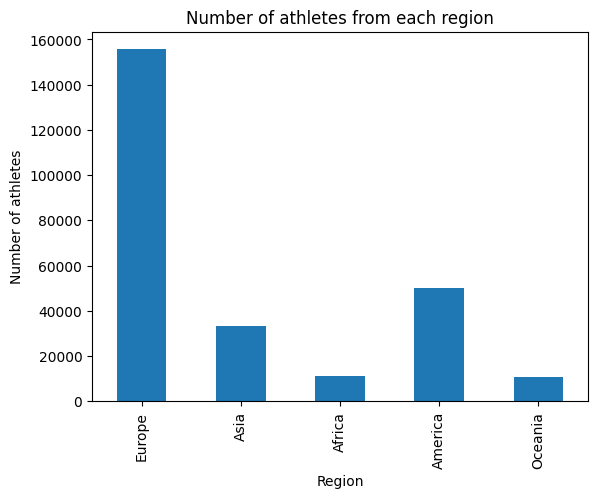

In [16]:
# 2.1
# ### 2.1. From which region do the most athletes come from?

# Count the number of athletes from each region
athletes_count = merged_data['continent'].value_counts()
athletes_count = athletes_count.reindex(regions_order)
athletes_count.plot(kind='bar')
plt.title('Number of athletes from each region')
plt.xlabel('Region')
plt.ylabel('Number of athletes')
plt.show()

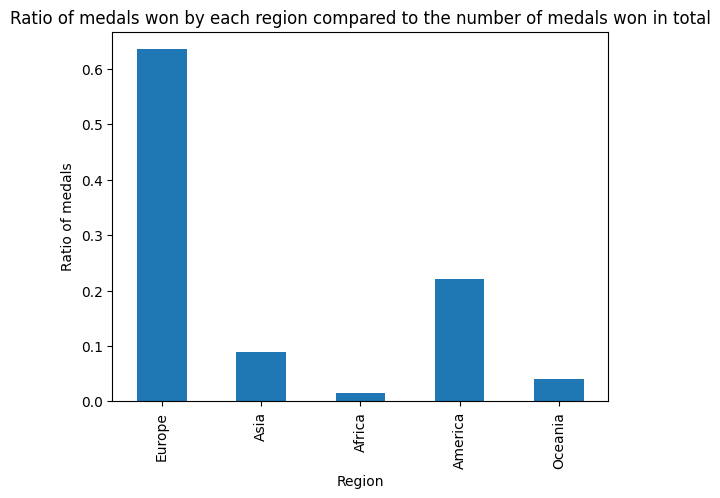

In [17]:
# 2.2
# Show the ratio of medals won by each country compared to the number of medals won in total
total_medals = medal_count.sum()
medal_ratio = medal_count / total_medals
medal_ratio = medal_ratio.reindex(regions_order)
medal_ratio.plot(kind='bar')
plt.title('Ratio of medals won by each region compared to the number of medals won in total')
plt.xlabel('Region')
plt.ylabel('Ratio of medals')
plt.show()